In [1]:
import pandas as pd

from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.inter_rater import cohens_kappa

# statsmodels.stats.contingency_tables.mcnema
from sklearn.metrics import cohen_kappa_score
from scipy import stats

import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_excel(
    "ANÁLISE DA PERCEPÇÃO ESTÉTICA DE ESPÉCIMES ANATÔMICOS PLASTINADOS COLORIDOS E NÃO COLORIDOS - COMPLENTO (1) - Respostas ao formulário 1.xlsx"
)

In [3]:
def tweak_plastinacao(df):
    df.columns = [
        "data_hora",
        "data",
        "n_tons",
        "identificacao",
        "conhecia_plastificacao",
        "contato_especime",
        "caso_sim",
        "prefere_colorido",
        "colorido_facilita_identificacao",
        "precebeu_diferenca_tonalidade_colorido",
        "ratos_wistar_tom",
        "comente_ratos",
        "animais_silvestres_tom",
        "comente_animais_silvestres",
        "percepcao_nao_coloridos",
        "percepcao_coloridos",
        "interessante_plastinados",
        "anterior_seja_positiva",
        "comentarios",
    ]

    # juntar categorias em publico geral e publico anatomia

    df["publico"] = (
        df["identificacao"]
        .isin(["Aluno de Anatomia", "Docente de Anatomia", "Técnico de Anatomia"])
        .map({False: "Publico Geral", True: "Publico Anatomia"})
    )

    return df

In [4]:
df = tweak_plastinacao(df_raw)


### Ratos Wistar (3 tons)

entre as pessoas que viram só 3 tons, quantas pessoas escolheram cada um dos 3 tons, entre publico geral e anatomia

In [5]:
df.query("n_tons == 3").groupby(["publico"])["ratos_wistar_tom"].value_counts(
    normalize=True
).unstack()

ratos_wistar_tom,Tom 1,Tom 2,Tom 3
publico,,,
Publico Anatomia,0.118182,0.436364,0.445455
Publico Geral,0.098039,0.464052,0.437908


### Ratos Wistar (5 tons)

entre as pessoas que viram só 5  tons, quantas pessoas escolheram cada um dos 5 tons, entre publico geral e anatomia

In [6]:
df.query("n_tons == 5").groupby(["publico"])["ratos_wistar_tom"].value_counts(
    normalize=True
).unstack()

ratos_wistar_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
publico,,,,,
Publico Anatomia,0.065693,0.240876,0.496350,0.167883,0.029197
Publico Geral,0.083682,0.347280,0.313808,0.138075,0.117155


### Animais Silvestres (3 tons)

entre as pessoas que viram só 3 tons, quantas pessoas escolheram cada um dos 3 tons, entre publico geral e anatomia

In [7]:
df.query("n_tons == 3").groupby(["publico"])["animais_silvestres_tom"].value_counts(
    normalize=True
).unstack()

animais_silvestres_tom,Tom 1,Tom 2,Tom 3
publico,,,
Publico Anatomia,0.236364,0.309091,0.454545
Publico Geral,0.241830,0.385621,0.372549


### Animais Silvestres (5 tons)

entre as pessoas que viram só 5 tons, quantas pessoas escolheram cada um dos 5 tons, entre publico geral e anatomia

In [8]:
df.query("n_tons == 5").groupby(["publico"])["animais_silvestres_tom"].value_counts(
    normalize=True
).unstack()

animais_silvestres_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
publico,,,,,
Publico Anatomia,0.116788,0.313869,0.306569,0.211679,0.051095
Publico Geral,0.175732,0.200837,0.301255,0.184100,0.138075


### Comparacao animais 3 tons


comparação cruzada entre as pessoas que so viram 3 tons,  "sera que as pessoas que escolheram 3 para ratos, escolheram 3 para animais silvestres?" dividio entre publico geral e anatomia

In [9]:
df.query("n_tons == 3").groupby(["publico"])[
    ["animais_silvestres_tom", "ratos_wistar_tom"]
].value_counts(normalize=False).unstack().fillna(0)

ratos_wistar_tom                         Tom 1  Tom 2  Tom 3
publico          animais_silvestres_tom                     
Publico Anatomia Tom 1                     7.0   11.0    8.0
                 Tom 2                     5.0   22.0    7.0
                 Tom 3                     1.0   15.0   34.0
Publico Geral    Tom 1                    11.0   14.0   12.0
                 Tom 2                     4.0   46.0    9.0
                 Tom 3                     0.0   11.0   46.0

### Comparacao animais 5 tons


comparação cruzada entre as pessoas que so viram 5 tons,  "sera que as pessoas que escolheram 3 para ratos, escolheram 3 para animais silvestres?" dividio entre publico geral e anatomia

In [10]:
df.query("n_tons == 5").groupby(["publico"])[
    ["animais_silvestres_tom", "ratos_wistar_tom"]
].value_counts(normalize=False).unstack().fillna(0)

ratos_wistar_tom                         Tom 1  Tom 2  Tom 3  Tom 4  Tom 5
publico          animais_silvestres_tom                                   
Publico Anatomia Tom 1                     2.0    3.0    8.0    2.0    1.0
                 Tom 2                     3.0   16.0   20.0    3.0    1.0
                 Tom 3                     1.0   10.0   22.0    9.0    0.0
                 Tom 4                     3.0    3.0   17.0    6.0    0.0
                 Tom 5                     0.0    1.0    1.0    3.0    2.0
Publico Geral    Tom 1                     9.0   17.0   10.0    3.0    3.0
                 Tom 2                     4.0   28.0   11.0    2.0    3.0
                 Tom 3                     3.0   18.0   39.0    8.0    4.0
                 Tom 4                     2.0   19.0   11.0    9.0    3.0
                 Tom 5                     2.0    1.0    4.0   11.0   15.0

## Teste Kappa (3 tons)

In [11]:
# ratos
y1 = df.query("n_tons == 3")["ratos_wistar_tom"].str.extract(r"(\d+)")
# animais
y2 = df.query("n_tons == 3")["animais_silvestres_tom"].str.extract(r"(\d+)")

cohen_kappa_score(y1, y2)

0.41922779219596595

In [12]:
# publico anatomia
anatomia_3 = (
    df.query("n_tons == 3")
    .groupby(["publico"])[["animais_silvestres_tom", "ratos_wistar_tom"]]
    .value_counts(normalize=False)
    .unstack()
    .fillna(0)
    .loc["Publico Anatomia"]
    .values
)
geral_3 = (
    df.query("n_tons == 3")
    .groupby(["publico"])[["animais_silvestres_tom", "ratos_wistar_tom"]]
    .value_counts(normalize=False)
    .unstack()
    .fillna(0)
    .loc["Publico Geral"]
    .values
)
print("Anatomia 3 tons")
print(cohens_kappa(anatomia_3))

print("Geral 3 tons")
print(cohens_kappa(geral_3))

Anatomia 3 tons
                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.3268
              ASE                       0.0699
              95% Lower Conf Limit      0.1899
              95% Upper Conf Limit      0.4638

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0682
              Z                         4.7929
              One-sided Pr >  Z         0.0000
              Two-sided Pr > |Z|        0.0000

Geral 3 tons
                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.4847
              ASE                       0.0564
              95% Lower Conf Limit      0.3742
              95% Upper Conf Limit      0.5953

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0580
              Z                         8.3516
              One-sided Pr >  Z     

In [13]:
# publico anatomia
anatomia_5 = (
    df.query("n_tons == 5")
    .groupby(["publico"])[["animais_silvestres_tom", "ratos_wistar_tom"]]
    .value_counts(normalize=False)
    .unstack()
    .fillna(0)
    .loc["Publico Anatomia"]
    .values
)
geral_5 = (
    df.query("n_tons == 5")
    .groupby(["publico"])[["animais_silvestres_tom", "ratos_wistar_tom"]]
    .value_counts(normalize=False)
    .unstack()
    .fillna(0)
    .loc["Publico Geral"]
    .values
)
print("Anatomia 5 tons")
print(cohens_kappa(anatomia_5))

print("Geral 5 tons")
print(cohens_kappa(geral_5))

Anatomia 5 tons
                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.1071
              ASE                       0.0543
              95% Lower Conf Limit      0.0006
              95% Upper Conf Limit      0.2135

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0481
              Z                         2.2271
              One-sided Pr >  Z         0.0130
              Two-sided Pr > |Z|        0.0259

Geral 5 tons
                  Simple Kappa Coefficient
              --------------------------------
              Kappa                     0.2538
              ASE                       0.0395
              95% Lower Conf Limit      0.1764
              95% Upper Conf Limit      0.3313

                 Test of H0: Simple Kappa = 0

              ASE under H0              0.0329
              Z                         7.7250
              One-sided Pr >  Z     

In [14]:
from statsmodels.stats.contingency_tables import mcnemar
from statsmodels.stats.inter_rater import cohens_kappa

# statsmodels.stats.contingency_tables.mcnema

In [15]:
display(anatomia_3)
print(mcnemar(anatomia_3))

array([[ 7., 11.,  8.],
       [ 5., 22.,  7.],
       [ 1., 15., 34.]])

pvalue      0.210113525390625
statistic   5.0


In [16]:
print(mcnemar(geral_3))

pvalue      0.0308837890625
statistic   4.0


In [17]:
print(mcnemar(anatomia_5))

pvalue      1.0
statistic   3.0


In [18]:
print(mcnemar(geral_5))

pvalue      0.007197380065917969
statistic   4.0


### Divisao ratos, pessoas que viram somente 3 ou 5 tons

In [19]:
ratos_3 = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=False)
    .unstack()
)
ratos_5 = (
    df.query("n_tons == 5")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=False)
    .unstack()
)

print("ratos 3")
display(ratos_3)

print("ratos 5")
display(ratos_5)

ratos 3


ratos_wistar_tom,Tom 1,Tom 2,Tom 3
publico,,,
Publico Anatomia,13,48,49
Publico Geral,15,71,67


ratos 5


ratos_wistar_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
publico,,,,,
Publico Anatomia,9,33,68,23,4
Publico Geral,20,83,75,33,28


In [20]:
print(stats.chi2_contingency(ratos_3))

Chi2ContingencyResult(statistic=0.3605588156954341, pvalue=0.8350368629604518, dof=2, expected_freq=array([[11.71102662, 49.77186312, 48.51711027],
       [16.28897338, 69.22813688, 67.48288973]]))


In [21]:
print(stats.chi2_contingency(ratos_5))

Chi2ContingencyResult(statistic=19.62664074359862, pvalue=0.0005916817631394325, dof=4, expected_freq=array([[10.56648936, 42.26595745, 52.1037234 , 20.40425532, 11.65957447],
       [18.43351064, 73.73404255, 90.8962766 , 35.59574468, 20.34042553]]))


## Questão 1 - ratos e animais, 3 e 5 tons, S e N

### Comparar as Q1, Q2, Q3, Q4, Q5 com 3 ou 5 opcoes e publico

### conhecia plastificação

In [22]:
# 3 tons
display(
    df.query("n_tons == 3")
    .groupby(["publico"])["conhecia_plastificacao"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["publico"])["conhecia_plastificacao"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

# 5 tons
display(
    df.query("n_tons == 5")
    .groupby(["publico"])["conhecia_plastificacao"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["publico"])["conhecia_plastificacao"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

conhecia_plastificacao,Não,Sim
publico,,
Publico Anatomia,0.354545,0.645455
Publico Geral,0.562092,0.437908


Chi2ContingencyResult(statistic=10.236435735875373, pvalue=0.0013769339498456111, dof=1, expected_freq=array([[52.28136882, 57.71863118],
       [72.71863118, 80.28136882]]))


conhecia_plastificacao,Não,Sim
publico,,
Publico Anatomia,0.445255,0.554745
Publico Geral,0.652720,0.347280


Chi2ContingencyResult(statistic=14.519717362032239, pvalue=0.00013870021255666504, dof=1, expected_freq=array([[ 79.06648936,  57.93351064],
       [137.93351064, 101.06648936]]))


### contato especime

In [23]:
display(
    df.query("n_tons == 3")
    .groupby(["publico"])["contato_especime"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["publico"])["contato_especime"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

# 5 tons
display(
    df.query("n_tons == 5")
    .groupby(["publico"])["contato_especime"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["publico"])["contato_especime"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

contato_especime,Não,Sim
publico,,
Publico Anatomia,0.390909,0.609091
Publico Geral,0.450980,0.549020


Chi2ContingencyResult(statistic=0.7147404317185442, pvalue=0.39787458101571604, dof=1, expected_freq=array([[46.84410646, 63.15589354],
       [65.15589354, 87.84410646]]))


contato_especime,Não,Sim
publico,,
Publico Anatomia,0.321168,0.678832
Publico Geral,0.573222,0.426778


Chi2ContingencyResult(statistic=21.162400736681143, pvalue=4.219620226823861e-06, dof=1, expected_freq=array([[ 65.94946809,  71.05053191],
       [115.05053191, 123.94946809]]))


### prefere tonalidade colorido

In [24]:
display(
    df.query("n_tons == 3")
    .groupby(["publico"])["precebeu_diferenca_tonalidade_colorido"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["publico"])["precebeu_diferenca_tonalidade_colorido"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

# 5 tons
display(
    df.query("n_tons == 5")
    .groupby(["publico"])["precebeu_diferenca_tonalidade_colorido"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["publico"])["precebeu_diferenca_tonalidade_colorido"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

precebeu_diferenca_tonalidade_colorido,Não,Sim
publico,,
Publico Anatomia,0.045455,0.954545
Publico Geral,0.026144,0.973856


Chi2ContingencyResult(statistic=0.25595130321276693, pvalue=0.6129154086246517, dof=1, expected_freq=array([[  3.76425856, 106.23574144],
       [  5.23574144, 147.76425856]]))


precebeu_diferenca_tonalidade_colorido,Não,Sim
publico,,
Publico Anatomia,0.007299,0.992701
Publico Geral,0.008368,0.991632


Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[  1.09308511, 135.90691489],
       [  1.90691489, 237.09308511]]))


### interessante plastinado

In [25]:
display(
    df.query("n_tons == 3")
    .groupby(["publico"])["interessante_plastinados"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["publico"])["interessante_plastinados"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

# 5 tons
display(
    df.query("n_tons == 5")
    .groupby(["publico"])["interessante_plastinados"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["publico"])["interessante_plastinados"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

interessante_plastinados,Não,Sim
publico,,
Publico Anatomia,0.000000,1.000000
Publico Geral,0.013072,0.986928


Chi2ContingencyResult(statistic=0.23447020919130457, pvalue=0.62822886456424, dof=1, expected_freq=array([[  0.8365019, 109.1634981],
       [  1.1634981, 151.8365019]]))


interessante_plastinados,Não,Sim
publico,,
Publico Anatomia,0.014599,0.985401
Publico Geral,0.000000,1.000000


Chi2ContingencyResult(statistic=1.291111575303437, pvalue=0.2558432025207631, dof=1, expected_freq=array([[  0.7287234, 136.2712766],
       [  1.2712766, 237.7287234]]))


pergunta: a população é semelhante em relação ao conhecimento e em relação entre a percepção entre cores para pessoas que só viram 3 ou 5 tons?

teste: quiquadrado

hipotese nula: as pessoas tem a mesma resposta\
hipotese alternativa: as pessoas tem resposta diferente

## Questão 4 - juntar as tabelas

### Conhecia plastinação, publico, tons

3 tons

In [26]:
display(
    df.query("n_tons == 3")
    .groupby(["conhecia_plastificacao"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["conhecia_plastificacao"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

display(
    df.query("n_tons == 3")
    .groupby(["contato_especime"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["contato_especime"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

display(
    df.query("n_tons == 3")
    .groupby(["precebeu_diferenca_tonalidade_colorido"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["precebeu_diferenca_tonalidade_colorido"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

display(
    df.query("n_tons == 3")
    .groupby(["interessante_plastinados"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 3")
        .groupby(["interessante_plastinados"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

publico,Publico Anatomia,Publico Geral
conhecia_plastificacao,,
Não,0.312000,0.688000
Sim,0.514493,0.485507


Chi2ContingencyResult(statistic=10.236435735875375, pvalue=0.0013769339498456111, dof=1, expected_freq=array([[52.28136882, 72.71863118],
       [57.71863118, 80.28136882]]))


publico,Publico Anatomia,Publico Geral
contato_especime,,
Não,0.383929,0.616071
Sim,0.443709,0.556291


Chi2ContingencyResult(statistic=0.7147404317185442, pvalue=0.39787458101571604, dof=1, expected_freq=array([[46.84410646, 65.15589354],
       [63.15589354, 87.84410646]]))


publico,Publico Anatomia,Publico Geral
precebeu_diferenca_tonalidade_colorido,,
Não,0.555556,0.444444
Sim,0.413386,0.586614


Chi2ContingencyResult(statistic=0.25595130321276693, pvalue=0.6129154086246517, dof=1, expected_freq=array([[  3.76425856,   5.23574144],
       [106.23574144, 147.76425856]]))


publico,Publico Anatomia,Publico Geral
interessante_plastinados,,
Não,0.000000,1.000000
Sim,0.421456,0.578544


Chi2ContingencyResult(statistic=0.23447020919130457, pvalue=0.62822886456424, dof=1, expected_freq=array([[  0.8365019,   1.1634981],
       [109.1634981, 151.8365019]]))


5 tons

In [27]:
display(
    df.query("n_tons == 5")
    .groupby(["conhecia_plastificacao"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["conhecia_plastificacao"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

display(
    df.query("n_tons == 5")
    .groupby(["contato_especime"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["contato_especime"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

display(
    df.query("n_tons == 5")
    .groupby(["precebeu_diferenca_tonalidade_colorido"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["precebeu_diferenca_tonalidade_colorido"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

display(
    df.query("n_tons == 5")
    .groupby(["interessante_plastinados"])["publico"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)
print(
    stats.chi2_contingency(
        df.query("n_tons == 5")
        .groupby(["interessante_plastinados"])["publico"]
        .value_counts(normalize=False)
        .unstack()
        .fillna(0)
    )
)

publico,Publico Anatomia,Publico Geral
conhecia_plastificacao,,
Não,0.281106,0.718894
Sim,0.477987,0.522013


Chi2ContingencyResult(statistic=14.519717362032239, pvalue=0.00013870021255666504, dof=1, expected_freq=array([[ 79.06648936, 137.93351064],
       [ 57.93351064, 101.06648936]]))


publico,Publico Anatomia,Publico Geral
contato_especime,,
Não,0.243094,0.756906
Sim,0.476923,0.523077


Chi2ContingencyResult(statistic=21.162400736681146, pvalue=4.219620226823852e-06, dof=1, expected_freq=array([[ 65.94946809, 115.05053191],
       [ 71.05053191, 123.94946809]]))


publico,Publico Anatomia,Publico Geral
precebeu_diferenca_tonalidade_colorido,,
Não,0.333333,0.666667
Sim,0.364611,0.635389


Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[  1.09308511,   1.90691489],
       [135.90691489, 237.09308511]]))


publico,Publico Anatomia,Publico Geral
interessante_plastinados,,
Não,1.000000,0.000000
Sim,0.360963,0.639037


Chi2ContingencyResult(statistic=1.291111575303437, pvalue=0.2558432025207631, dof=1, expected_freq=array([[  0.7287234,   1.2712766],
       [136.2712766, 237.7287234]]))


pergunta: a população é semelhante em relação ao conhecimento e em relação entre a percepção entre cores para pessoas que só viram 3 ou 5 tons?

teste: quiquadrado

hipotese nula: as pessoas tem a mesma resposta\
hipotese alternativa: as pessoas tem resposta diferente

## Questao 2 - ratos

ver separado rato e animal - comparar tecnico e geral para 3 opcoes x 5 opcoes

pergunta: sera que o publico tecnico e geral tem a mesma opiniao sobre os tons?\
teste: quiquadrado independência\
hipotese nula: eles tem a mesma opiniao\
hipotese alternativa: eles nao tem a mesma opiniao

3 opcoes ratos

### Juntar tudo em uma tabela

publico,Publico Anatomia,Publico Geral
ratos_wistar_tom,,
Tom 1,0.118182,0.098039
Tom 2,0.436364,0.464052
Tom 3,0.445455,0.437908


publico,Publico Anatomia,Publico Geral
ratos_wistar_tom,,
Tom 1,13,15
Tom 2,48,71
Tom 3,49,67


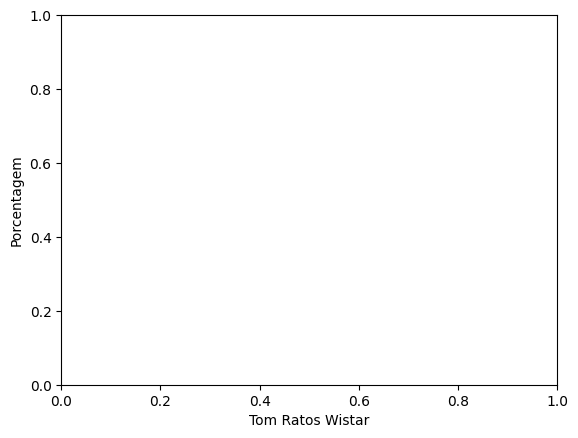

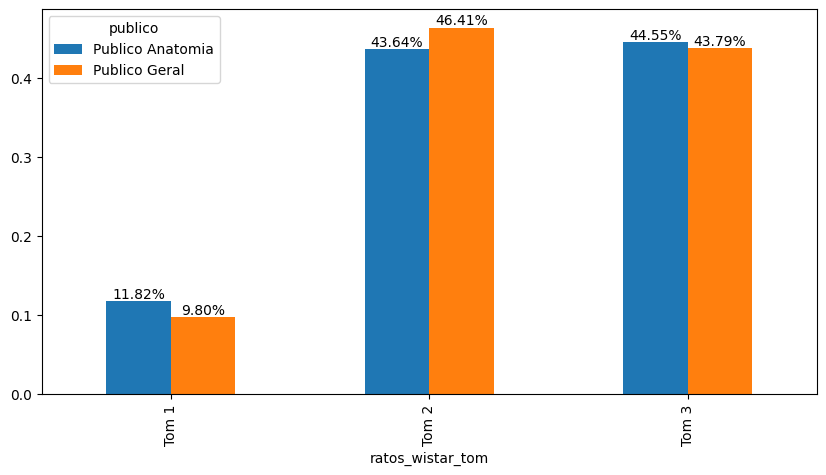

In [53]:
# porcentagem do geral

display(
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T  # .plot(kind='bar', stacked=False, figsize=(10, 5))
)
plt.xlabel("Tom Ratos Wistar")
plt.ylabel("Porcentagem")

ratos_3t_publico = (
    df.query("n_tons == 3")
    .groupby(["ratos_wistar_tom"])["publico"]
    .value_counts(normalize=False)
    .unstack()
)
# plt.title(f'Ratos Wistar - $\chi^2$ = {stats.chi2_contingency(ratos_3t_publico).pvalue:.3f}')
# legend = plt.legend(title="Público", loc=2, fontsize='small', fancybox=True)
# display(ratos_3t_publico.plot())

display(ratos_3t_publico)

import matplotlib.pyplot as plt

data = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T
)

fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind="bar", stacked=False, ax=ax)

# Add text labels above each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ".2%"),
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.show()

In [79]:
def plot_vertical_bar_normal(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="bar", stacked=False, ax=ax)

    # Add text labels above each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), ".2%"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()


def plot_stacked_bar_normal(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="bar", stacked=True, ax=ax)

    # add text inside each bar, 2 decimal places
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(
            f"{height:.2%}",
            (x + 0.5 * width, y + 0.5 * height),
            ha="center",
            va="center",
        )

    # change legend title
    ax.legend(title="Público", loc=2, fontsize="small", fancybox=True)

    # change xlabel

    ax.set_xlabel("Tom Ratos Wistar")

    # rotate xaxis 45

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.show()


def plot_horizontal_bar(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="barh", stacked=False, ax=ax)

    # Add text labels on the side of each bar
    for p in ax.patches:
        ax.annotate(
            format(p.get_width(), ".2%"),
            (p.get_width(), p.get_y() + p.get_height() / 2.0),
            ha="center",
            va="center",
            xytext=(5, 0),
            textcoords="offset points",
        )

    plt.show()


def plot_horizontal_stacked_bar(data):
    fig, ax = plt.subplots(figsize=(10, 5))
    data.plot(kind="barh", stacked=True, ax=ax)

    # Add text labels on the side of each bar

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(
            f"{width:.2%}",
            (x + 0.5 * width, y + 0.5 * height),
            ha="center",
            va="center",
        )

    plt.show()


def junta_bar(data):
    data = data.stack(0).reset_index(name='percentage')
    # join the first two columns into one
    data["publico_x"] = data.iloc[:, 0] + " " + data.iloc[:, 1]

    # do a bar plot with publico_rato and percentage

    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(
        x="percentage",
        y="publico_x",
        data=data.sort_values("percentage", ascending=False),
        ax=ax,
    )
    plt.show()


def pie_chart(data):
    data = data.stack(0).reset_index(name='percentage')

    # join the first two columns into one
    data["publico_x"] = data.iloc[:, 0] + " " + data.iloc[:, 1]

    # pie chart
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.pie(
        data["percentage"],
        labels=data["publico_x"],
        autopct="%1.1f%%",
        startangle=90,
    )

    plt.show()

In [80]:
# plot data

data_3_ratos = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
)


data_5_ratos = (
    df.query("n_tons == 5")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
)

data_3_animais = (
    df.query("n_tons == 3")
    .groupby(["publico"])["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
)

data_5_animais = (
    df.query("n_tons == 5")
    .groupby(["publico"])["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
)

------------------DADOS 1------------------------------


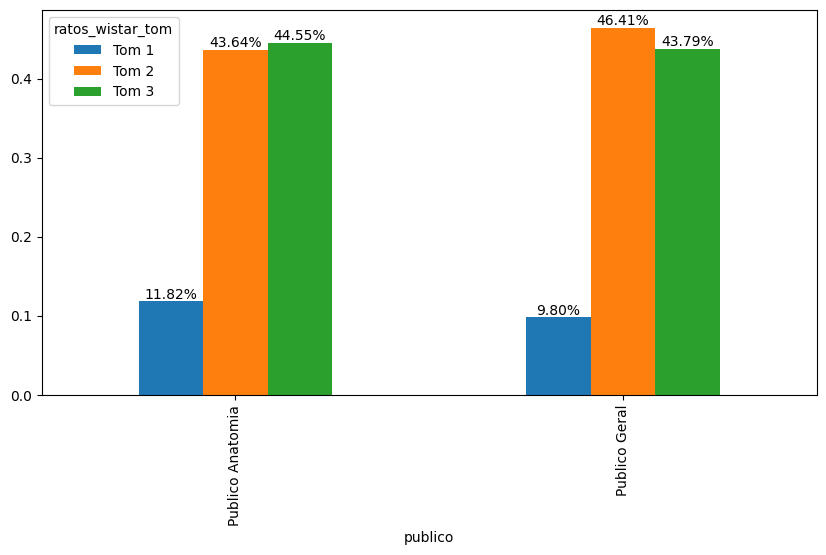

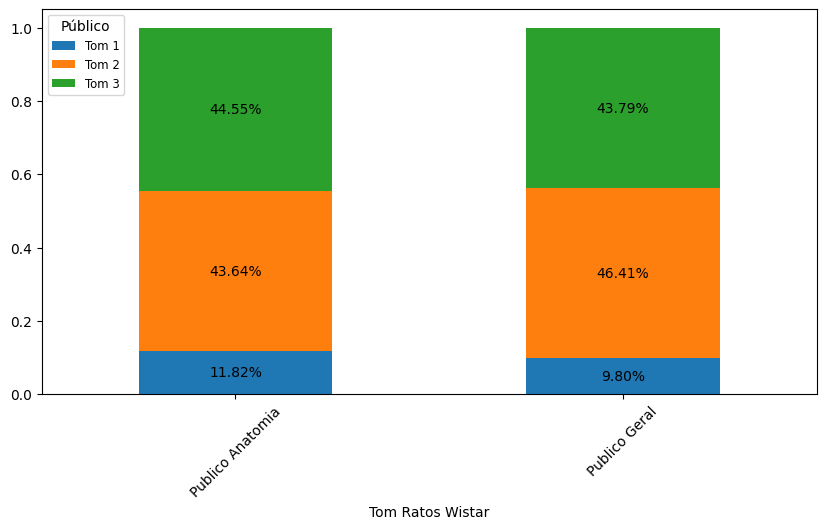

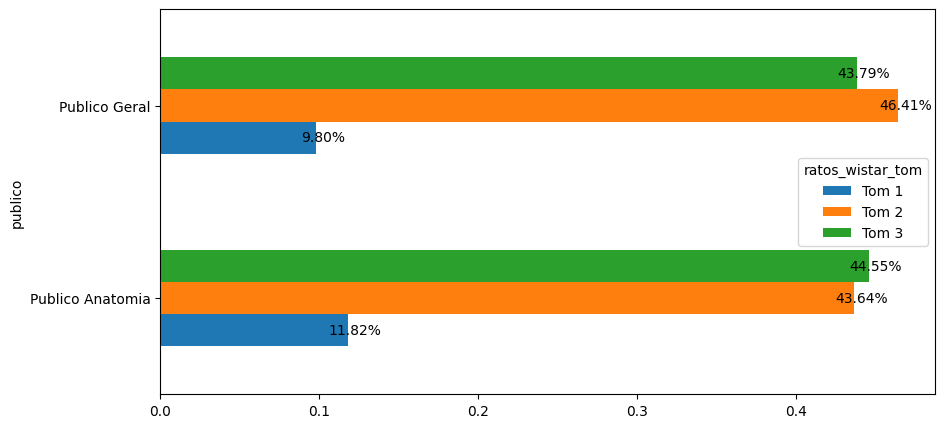

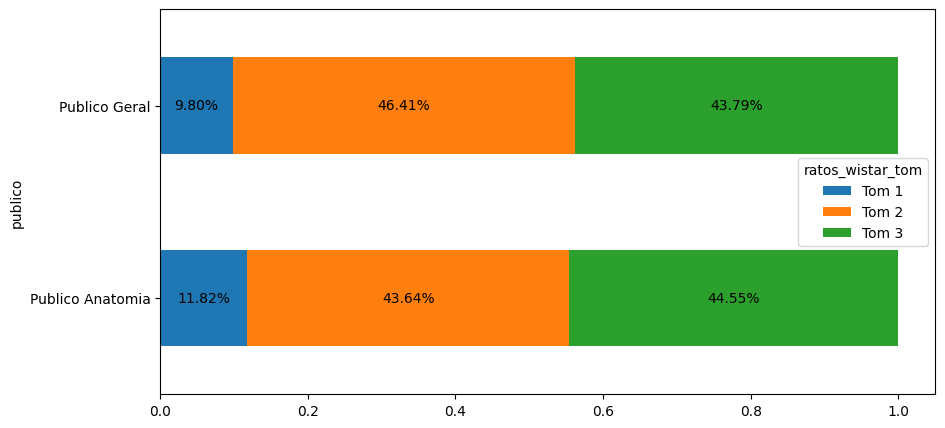

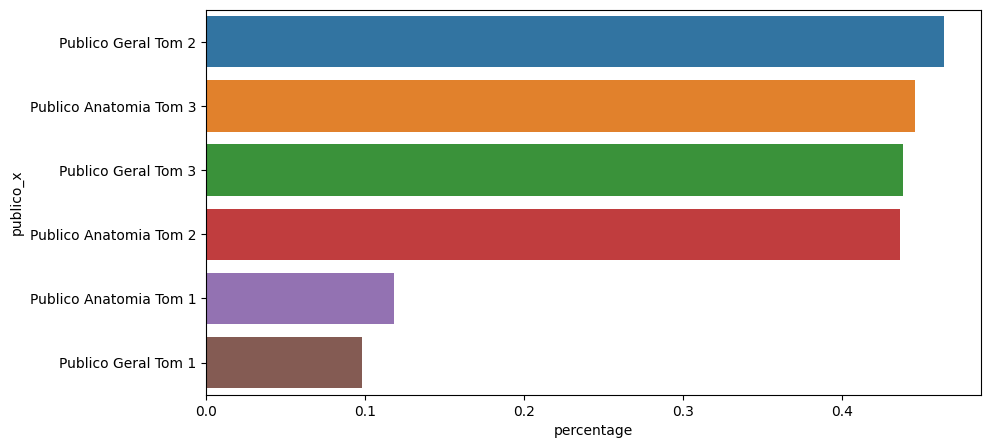

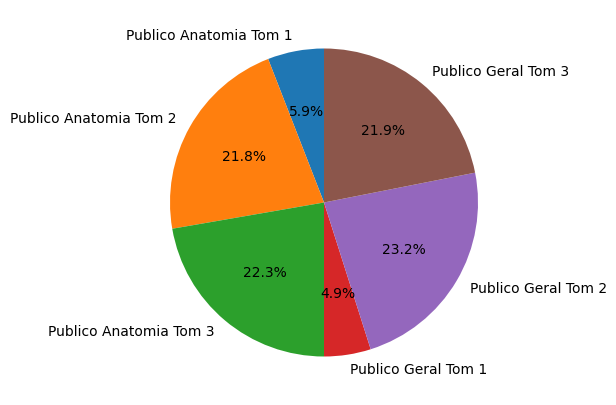

------------------DADOS 2------------------------------


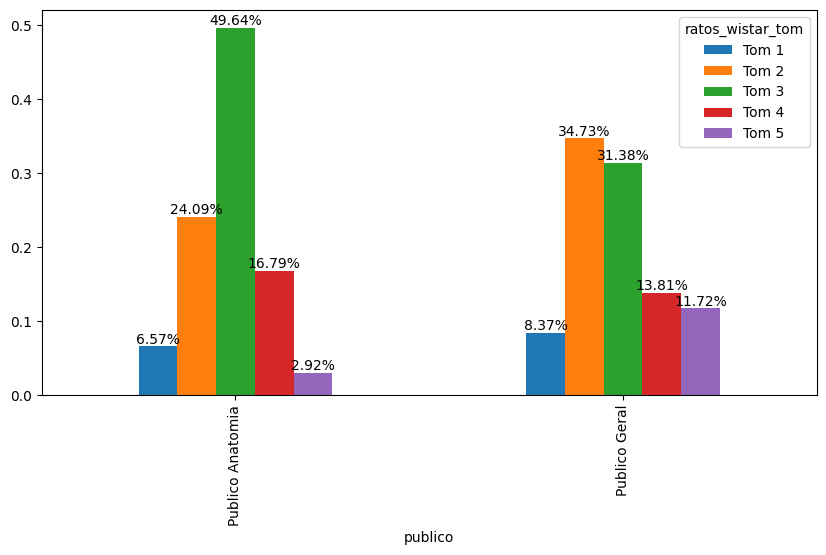

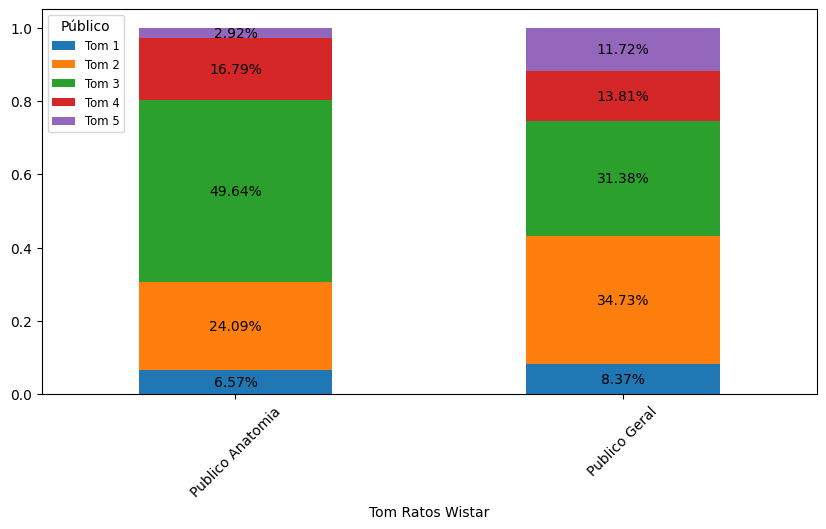

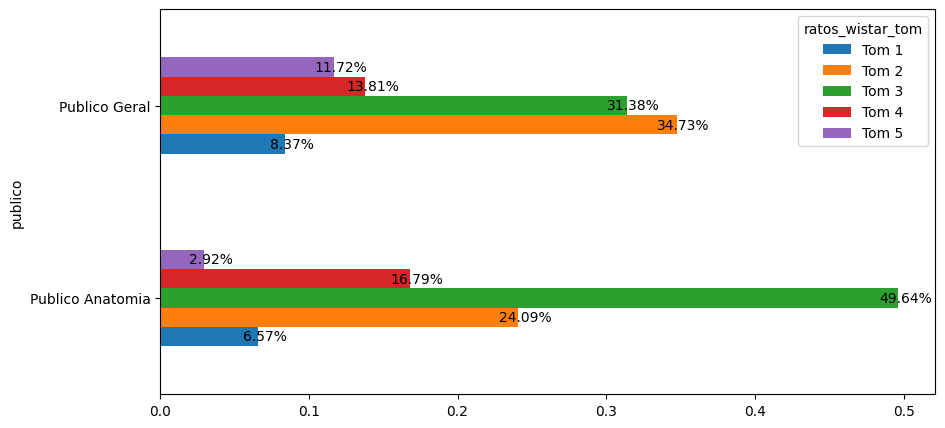

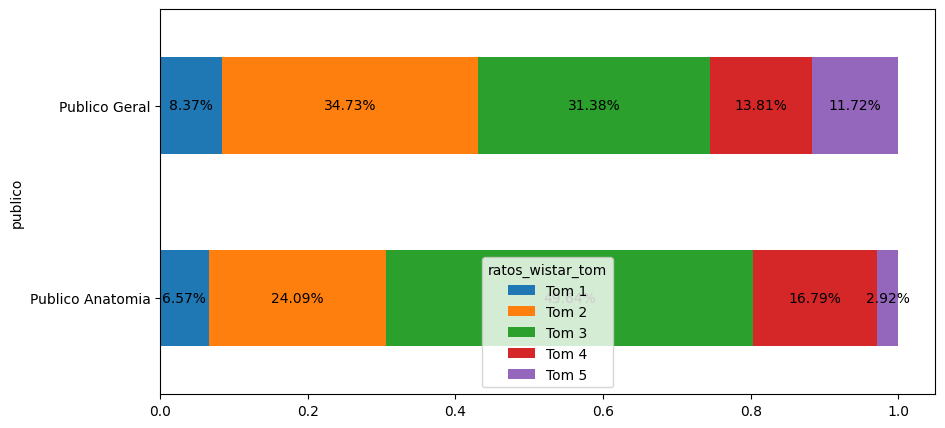

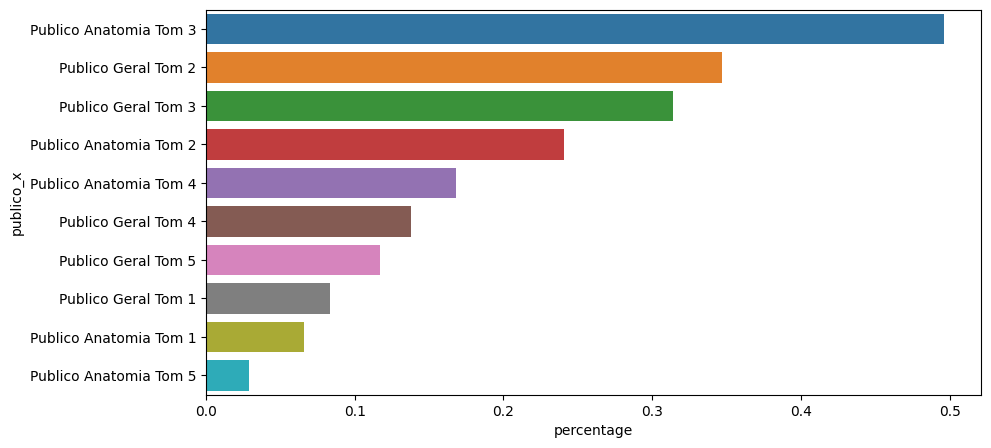

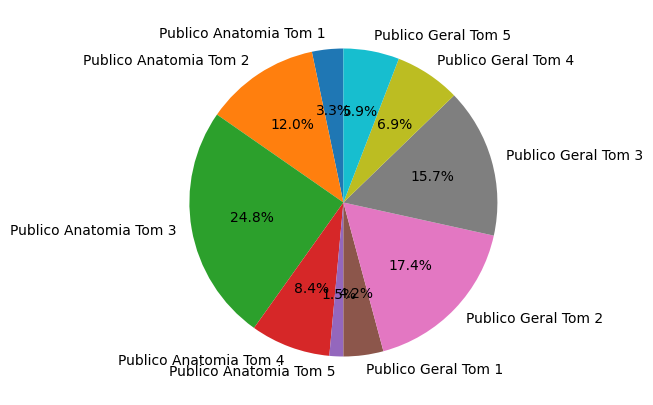

------------------DADOS 3------------------------------


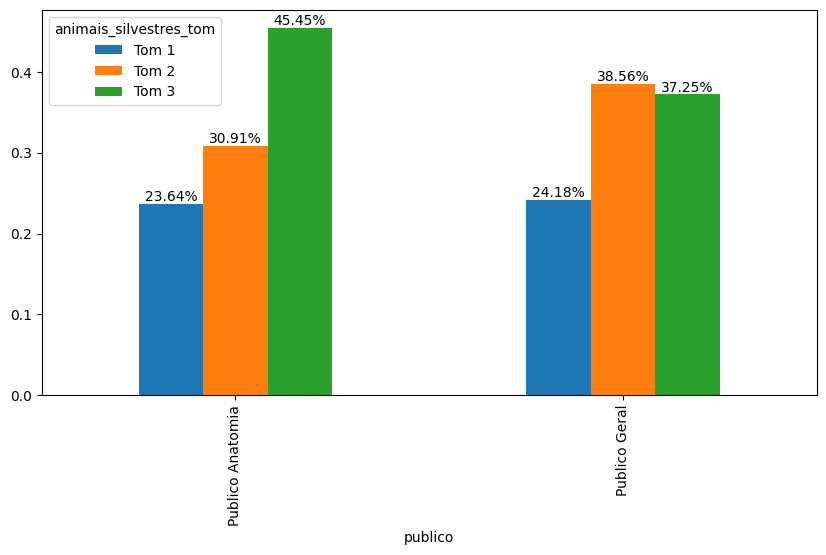

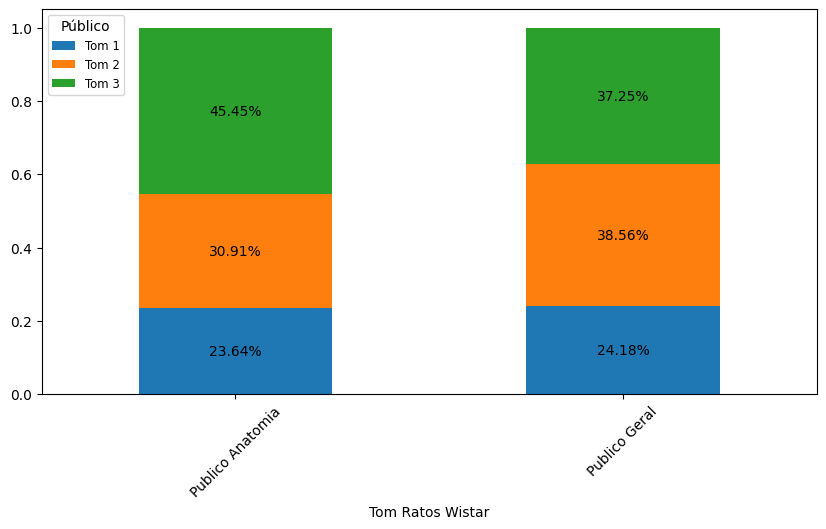

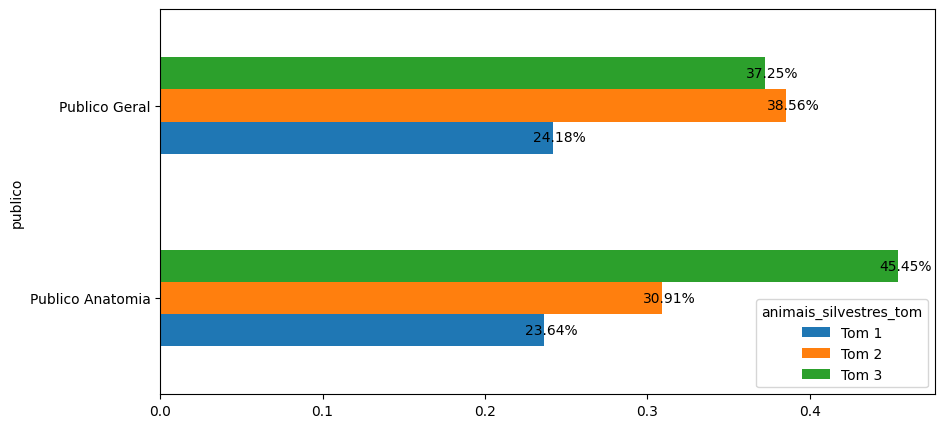

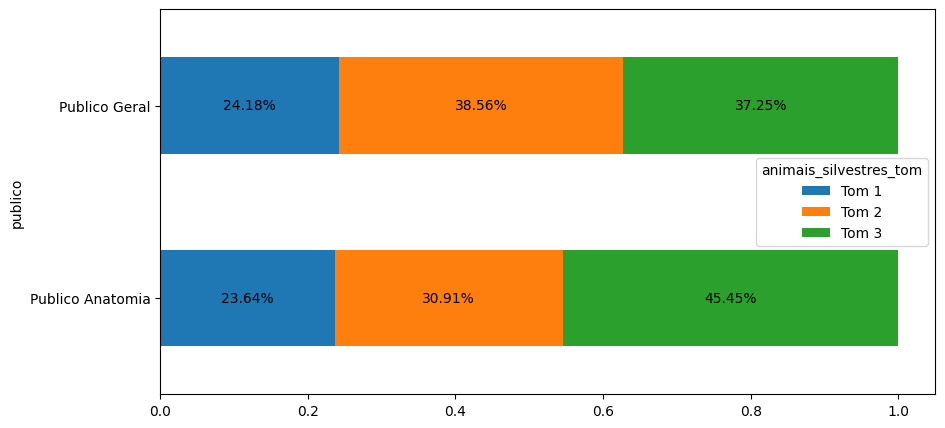

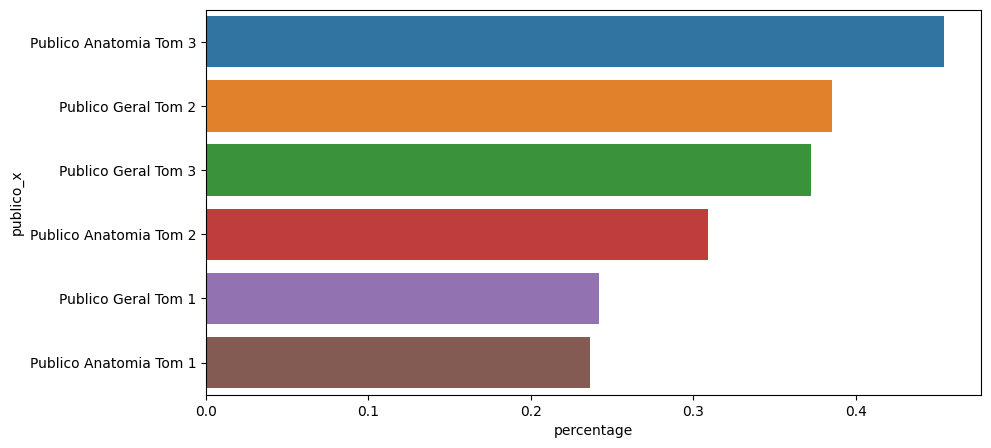

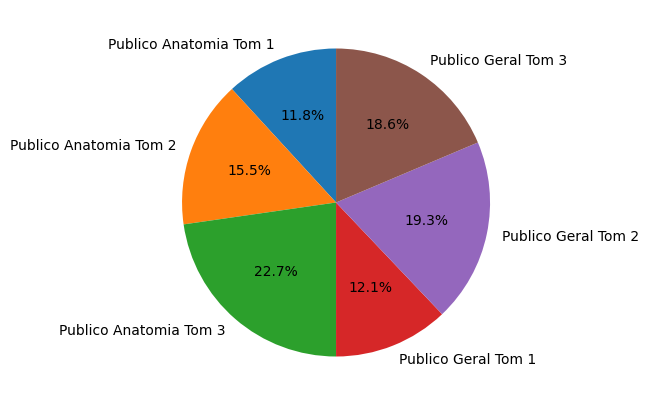

------------------DADOS 4------------------------------


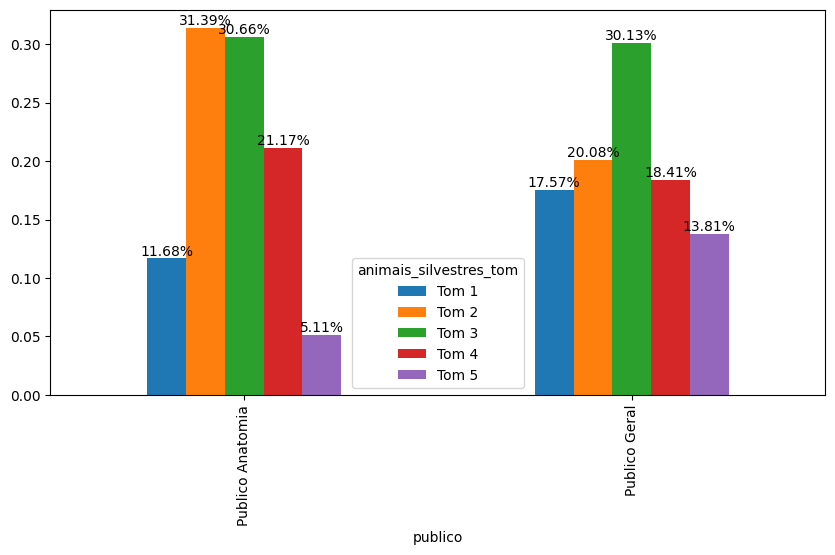

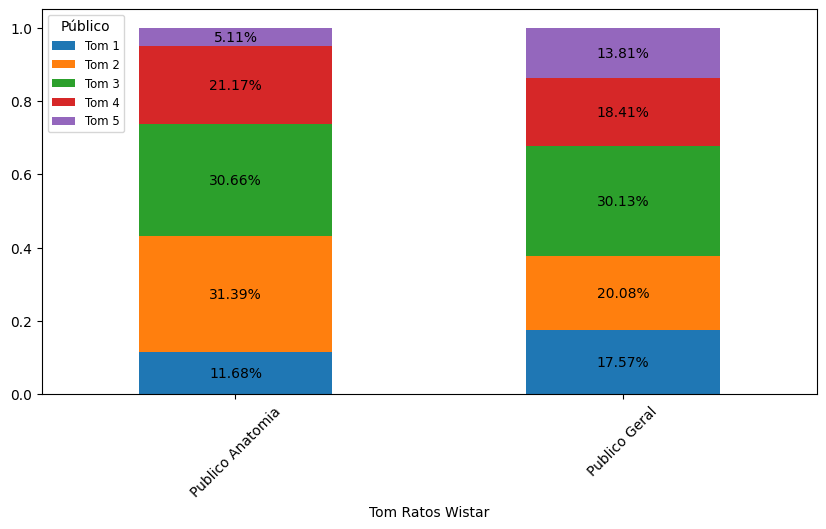

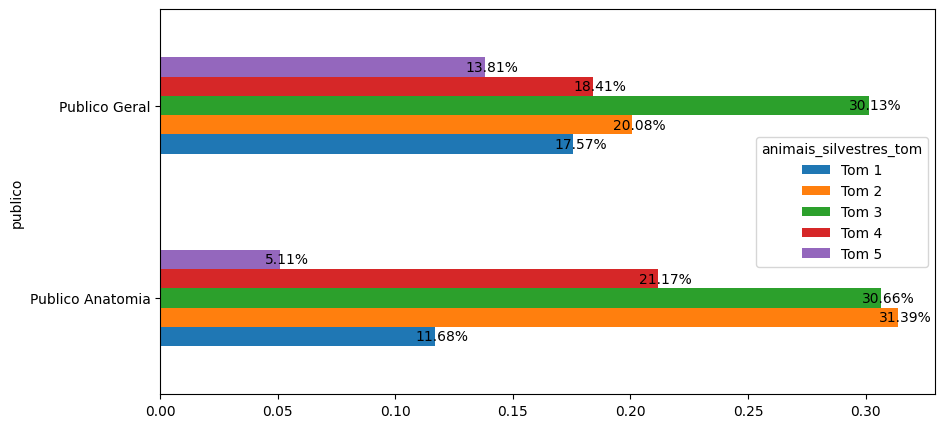

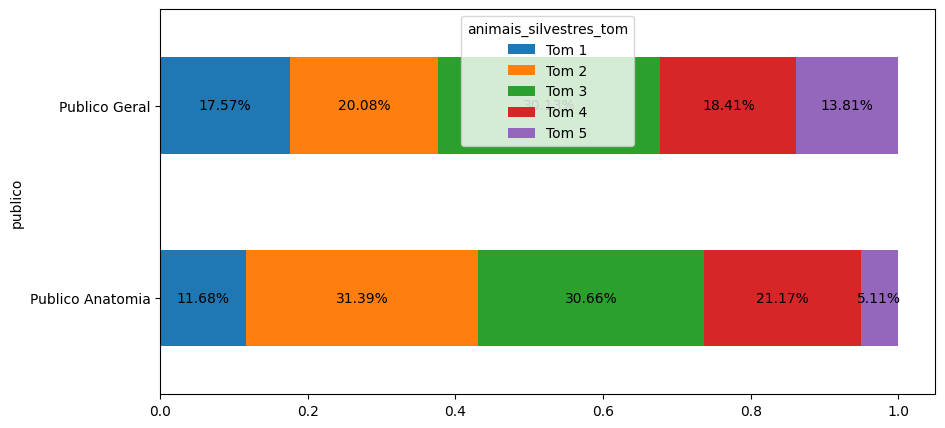

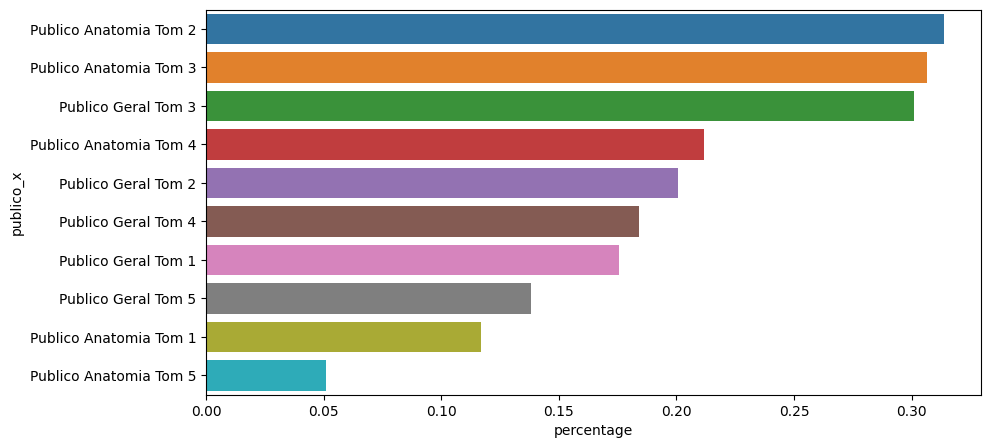

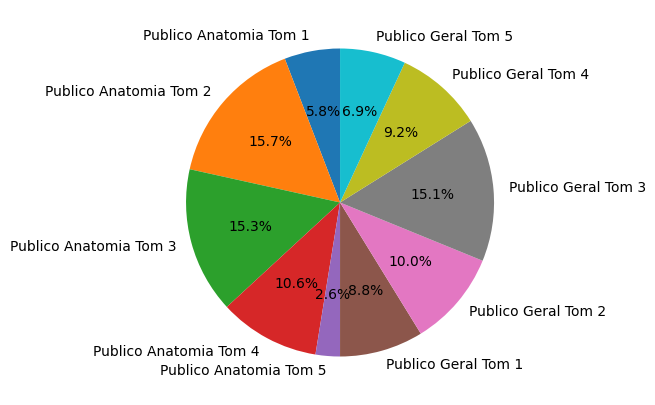

In [83]:
dados = [data_3_ratos, data_5_ratos, data_3_animais, data_5_animais]


# plot_stacked_bar_normal(data_5_animais)
for (i, d) in enumerate(dados):
    print(f"------------------DADOS {i+1}------------------------------")
    plot_vertical_bar_normal(d)
    plot_stacked_bar_normal(d)
    plot_horizontal_bar(d)
    plot_horizontal_stacked_bar(d)
    junta_bar(d)
    pie_chart(d)

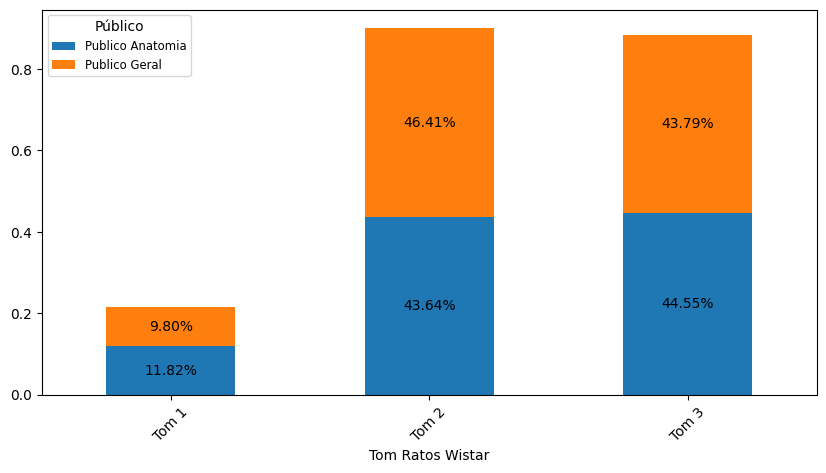

In [21]:
import matplotlib.pyplot as plt

data = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T
)

fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind="bar", stacked=True, ax=ax)

# add text inside each bar, 2 decimal places
"""
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2%'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
"""

# add text inside each bar, 2 decimal places
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        f"{height:.2%}", (x + 0.5 * width, y + 0.5 * height), ha="center", va="center"
    )


# change legend title
ax.legend(title="Público", loc=2, fontsize="small", fancybox=True)

# change xlabel

ax.set_xlabel("Tom Ratos Wistar")

# rotate xaxis 45

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

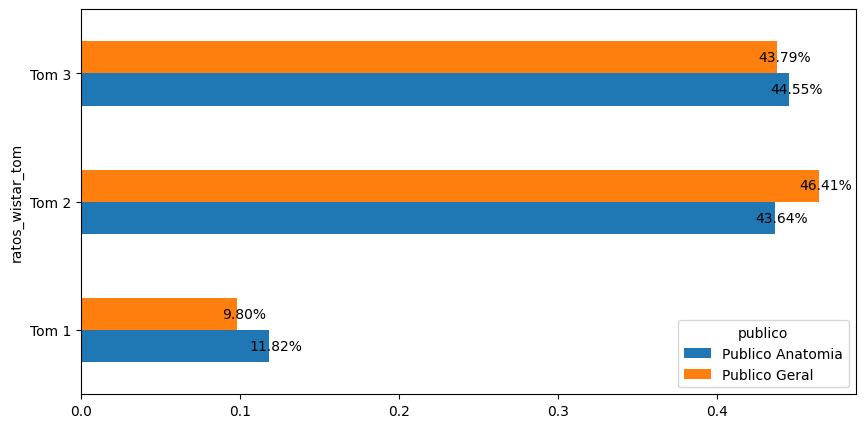

In [23]:
# horizontal bar plot

data = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T
)

fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind="barh", stacked=False, ax=ax)

# Add text labels on the side of each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_width(), ".2%"),
        (p.get_width(), p.get_y() + p.get_height() / 2.0),
        ha="center",
        va="center",
        xytext=(5, 0),
        textcoords="offset points",
    )

plt.show()

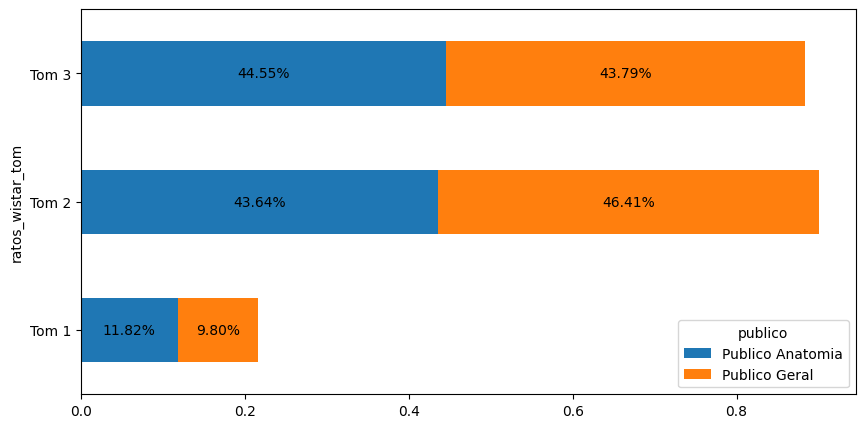

In [25]:
# stacked horizontal bar plot

data = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T
)

fig, ax = plt.subplots(figsize=(10, 5))
data.plot(kind="barh", stacked=True, ax=ax)

# Add text labels on the side of each bar

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(
        f"{width:.2%}", (x + 0.5 * width, y + 0.5 * height), ha="center", va="center"
    )

plt.show()

<Axes: xlabel='percentage', ylabel='publico_rato'>

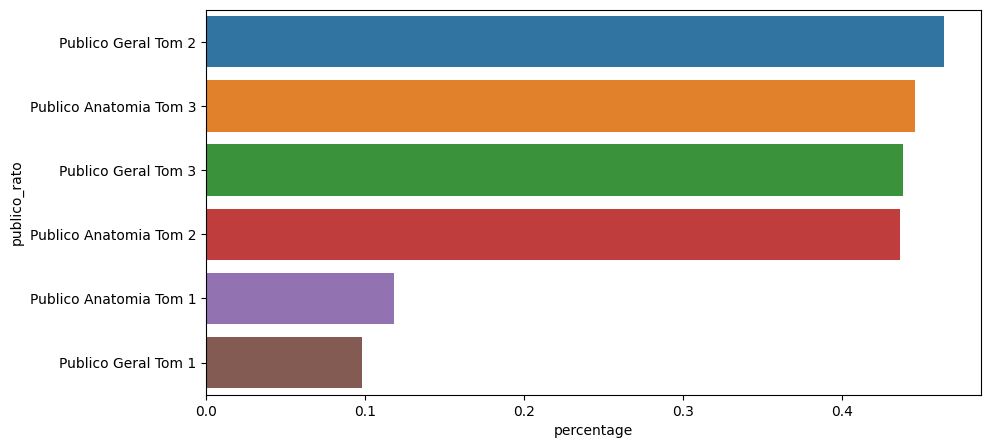

In [48]:
data = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .reset_index(name="percentage")
)

data = data.reset_index(name="percentage")
# join the first two columns into one
data["publico_rato"] = data["publico"] + " " + data["ratos_wistar_tom"]

# do a bar plot with publico_rato and percentage

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    x="percentage",
    y="publico_rato",
    data=data.sort_values("percentage", ascending=False),
    ax=ax,
)
plt.show()
# Add text labels on the side of each bar

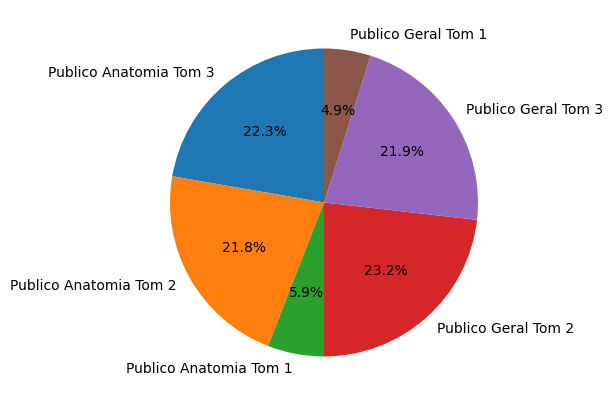

In [52]:
data = (
    df.query("n_tons == 3")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .reset_index(name="percentage")
)

# join the first two columns into one
data["publico_rato"] = data["publico"] + " " + data["ratos_wistar_tom"]

# pie chart

fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(
    data["percentage"], labels=data["publico_rato"], autopct="%1.1f%%", startangle=90
)

plt.show()
# Add text labels on the side of each bar

5 opcoes ratos

publico,Publico Anatomia,Publico Geral
ratos_wistar_tom,,
Tom 1,0.065693,0.083682
Tom 2,0.240876,0.347280
Tom 3,0.496350,0.313808
Tom 4,0.167883,0.138075
Tom 5,0.029197,0.117155


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


publico,Publico Anatomia,Publico Geral
ratos_wistar_tom,,
Tom 1,9,20
Tom 2,33,83
Tom 3,68,75
Tom 4,23,33
Tom 5,4,28


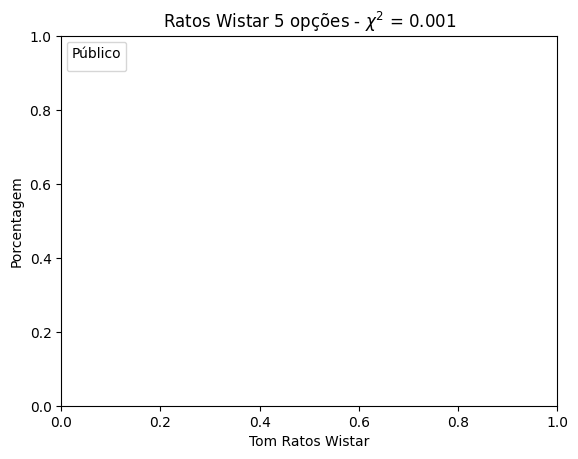

In [29]:
# porcentagem do geral

display(
    df.query("n_tons == 5")
    .groupby(["publico"])["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T  # .plot(kind='bar', stacked=False, figsize=(10, 5))
)
plt.xlabel("Tom Ratos Wistar")
plt.ylabel("Porcentagem")

ratos_5t_publico = (
    df.query("n_tons == 5")
    .groupby(["ratos_wistar_tom"])["publico"]
    .value_counts(normalize=False)
    .unstack()
)
plt.title(
    f"Ratos Wistar 5 opções - $\chi^2$ = {stats.chi2_contingency(ratos_5t_publico).pvalue:.3f}"
)
legend = plt.legend(title="Público", loc=2, fontsize="small", fancybox=True)
# display(ratos_3t_publico.plot())

display(ratos_5t_publico)

3 opcoes animais

<Axes: xlabel='animais_silvestres_tom'>

publico,Publico Anatomia,Publico Geral
animais_silvestres_tom,,
Tom 1,26,37
Tom 2,34,59
Tom 3,50,57


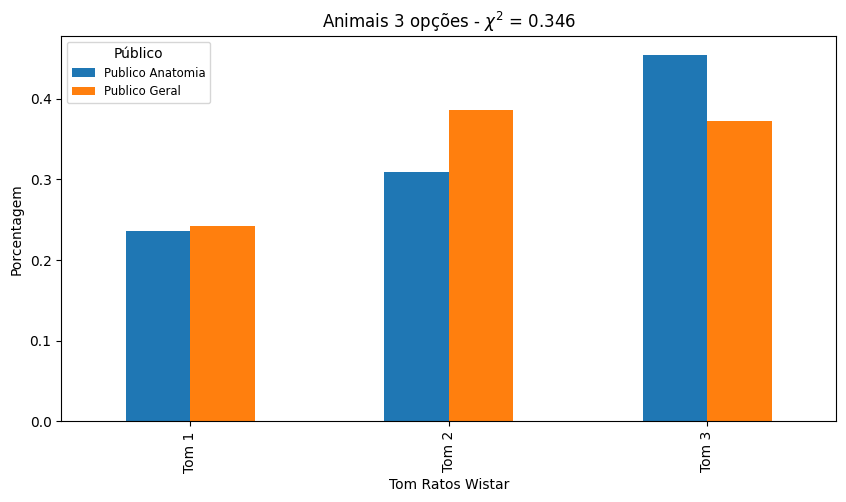

In [30]:
# porcentagem do geral

display(
    df.query("n_tons == 3")
    .groupby(["publico"])["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T.plot(kind="bar", stacked=False, figsize=(10, 5))
)
plt.xlabel("Tom Ratos Wistar")
plt.ylabel("Porcentagem")

ratos_5t_publico = (
    df.query("n_tons == 3")
    .groupby(["animais_silvestres_tom"])["publico"]
    .value_counts(normalize=False)
    .unstack()
)
plt.title(
    f"Animais 3 opções - $\chi^2$ = {stats.chi2_contingency(ratos_5t_publico).pvalue:.3f}"
)
legend = plt.legend(title="Público", loc=2, fontsize="small", fancybox=True)
# display(ratos_3t_publico.plot())

display(ratos_5t_publico)

5 opcoes animais

publico,Publico Anatomia,Publico Geral
animais_silvestres_tom,,
Tom 1,0.116788,0.175732
Tom 2,0.313869,0.200837
Tom 3,0.306569,0.301255
Tom 4,0.211679,0.184100
Tom 5,0.051095,0.138075


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


publico,Publico Anatomia,Publico Geral
animais_silvestres_tom,,
Tom 1,16,42
Tom 2,43,48
Tom 3,42,72
Tom 4,29,44
Tom 5,7,33


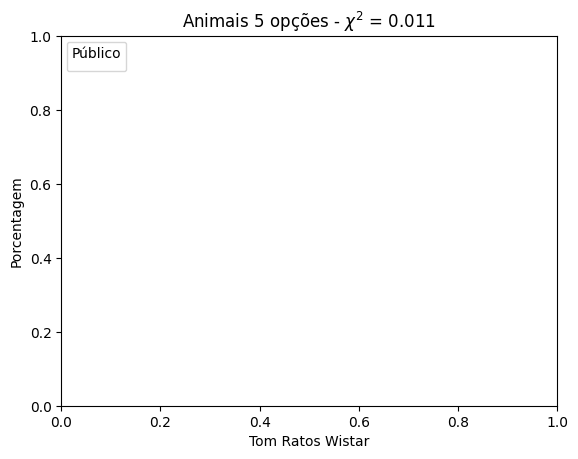

In [31]:
# porcentagem do geral

display(
    df.query("n_tons == 5")
    .groupby(["publico"])["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
    .T  # .plot(kind='bar', stacked=False, figsize=(10, 5))
)
plt.xlabel("Tom Ratos Wistar")
plt.ylabel("Porcentagem")

ratos_5t_publico = (
    df.query("n_tons == 5")
    .groupby(["animais_silvestres_tom"])["publico"]
    .value_counts(normalize=False)
    .unstack()
)
plt.title(
    f"Animais 5 opções - $\chi^2$ = {stats.chi2_contingency(ratos_5t_publico).pvalue:.3f}"
)
legend = plt.legend(title="Público", loc=2, fontsize="small", fancybox=True)
# display(ratos_3t_publico.plot())

display(ratos_5t_publico)

## Questao 3 - modificada
comparar para tecnico e geral, resposta 3, 5 entre rato e animal ( 4 tabelas, cohen_kappa, macnemar)

pergunta: sera que as diferentes populações concordam entre os tons dos animais?

teste: quiquadrado independencia\
hipotese nula: as populações concordam entre os tons de animais\
hipontese alternativa: as populacoes nao concordam entre os tons de animais

In [36]:
# 3 tecnico
tecnico_3tons = (
    df.query('n_tons == 3 and publico == "Publico Anatomia"')
    .groupby(["ratos_wistar_tom"])["animais_silvestres_tom"]
    .value_counts()
    .unstack()
    .fillna(0)
)
print("tecnico 3 tons")
display(tecnico_3tons)
print(stats.chi2_contingency(tecnico_3tons))
# 3 geral
geral_3tons = (
    df.query('n_tons == 3 and publico == "Publico Geral"')
    .groupby(["ratos_wistar_tom"])["animais_silvestres_tom"]
    .value_counts()
    .unstack()
    .fillna(0)
)
print("geral_3tons")
display(geral_3tons)
print(stats.chi2_contingency(geral_3tons))
# 5 tecnico
tecnico_5tons = (
    df.query('n_tons == 5 and publico == "Publico Anatomia"')
    .groupby(["ratos_wistar_tom"])["animais_silvestres_tom"]
    .value_counts()
    .unstack()
    .fillna(0)
)
print("tecnico_5tons")
display(tecnico_5tons)
print(stats.chi2_contingency(tecnico_5tons))
# 5 geral
geral_5tons = (
    df.query('n_tons == 5 and publico == "Publico Geral"')
    .groupby(["ratos_wistar_tom"])["animais_silvestres_tom"]
    .value_counts()
    .unstack()
    .fillna(0)
)
print("geral_5tons")
display(geral_5tons)
print(stats.chi2_contingency(geral_5tons))

# df.groupby(["ratos_wistar_tom"])["animais_silvestres_tom"].value_counts().unstack()

tecnico 3 tons


animais_silvestres_tom,Tom 1,Tom 2,Tom 3
ratos_wistar_tom,,,
Tom 1,7,5,1
Tom 2,11,22,15
Tom 3,8,7,34


Chi2ContingencyResult(statistic=26.601046513279865, pvalue=2.393360239117975e-05, dof=4, expected_freq=array([[ 3.07272727,  4.01818182,  5.90909091],
       [11.34545455, 14.83636364, 21.81818182],
       [11.58181818, 15.14545455, 22.27272727]]))
geral_3tons


animais_silvestres_tom,Tom 1,Tom 2,Tom 3
ratos_wistar_tom,,,
Tom 1,11.0,4.0,0.0
Tom 2,14.0,46.0,11.0
Tom 3,12.0,9.0,46.0


Chi2ContingencyResult(statistic=73.19345076876974, pvalue=4.801690129683208e-15, dof=4, expected_freq=array([[ 3.62745098,  5.78431373,  5.58823529],
       [17.16993464, 27.37908497, 26.45098039],
       [16.20261438, 25.83660131, 24.96078431]]))
tecnico_5tons


animais_silvestres_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
ratos_wistar_tom,,,,,
Tom 1,2.0,3.0,1.0,3.0,0.0
Tom 2,3.0,16.0,10.0,3.0,1.0
Tom 3,8.0,20.0,22.0,17.0,1.0
Tom 4,2.0,3.0,9.0,6.0,3.0
Tom 5,1.0,1.0,0.0,0.0,2.0


Chi2ContingencyResult(statistic=36.06286987952586, pvalue=0.002835865069118951, dof=16, expected_freq=array([[ 1.05109489,  2.82481752,  2.75912409,  1.90510949,  0.45985401],
       [ 3.8540146 , 10.35766423, 10.11678832,  6.98540146,  1.68613139],
       [ 7.94160584, 21.34306569, 20.84671533, 14.39416058,  3.47445255],
       [ 2.68613139,  7.2189781 ,  7.05109489,  4.86861314,  1.17518248],
       [ 0.46715328,  1.25547445,  1.22627737,  0.84671533,  0.20437956]]))
geral_5tons


animais_silvestres_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
ratos_wistar_tom,,,,,
Tom 1,9,4,3,2,2
Tom 2,17,28,18,19,1
Tom 3,10,11,39,11,4
Tom 4,3,2,8,9,11
Tom 5,3,3,4,3,15


Chi2ContingencyResult(statistic=102.57335730513176, pvalue=1.1385149771055649e-14, dof=16, expected_freq=array([[ 3.51464435,  4.0167364 ,  6.0251046 ,  3.68200837,  2.76150628],
       [14.58577406, 16.66945607, 25.0041841 , 15.28033473, 11.46025105],
       [13.17991632, 15.06276151, 22.59414226, 13.80753138, 10.35564854],
       [ 5.79916318,  6.62761506,  9.94142259,  6.07531381,  4.55648536],
       [ 4.92050209,  5.62343096,  8.43514644,  5.15481172,  3.86610879]]))


In [33]:
# todos os publicos, 3 e 5 tons concordam?


### Separar virgulas

In [34]:
# def put_list(x):
#     try:
#         return [el.strip() for el in str(x).split(",")]
#     except:
#         return x


# df['Meio usado para compras'] = df["Meio usado para compras"].apply(put_list)

# df = df.explode('Meio usado para compras')

# df = df[df['Meio usado para compras'] != 'nan']

## Questão 5

compara as escolhas de cor entre 3 e 5 tons, separando animal e rato, geral e tecnico

In [1]:
df


NameError: name 'df' is not defined

In [52]:
# display(df.groupby(['publico', 'n_tons'])['ratos_wistar_tom'].value_counts(normalize=True).unstack().fillna(0).astype(float))

ratos_q5_tec = (
    df.query('publico == "Publico Anatomia"')
    .groupby("n_tons")["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .astype(float)
)
display(ratos_q5_tec)
print(stats.chi2_contingency(ratos_q5_tec))
# ---
ratos_q5_tec = (
    df.query('publico == "Publico Geral"')
    .groupby("n_tons")["ratos_wistar_tom"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .astype(float)
)
display(ratos_q5_tec)
print(stats.chi2_contingency(ratos_q5_tec))
# ---
ratos_q5_tec = (
    df.query('publico == "Publico Anatomia"')
    .groupby("n_tons")["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .astype(float)
)
display(ratos_q5_tec)
print(stats.chi2_contingency(ratos_q5_tec))
# ---
ratos_q5_tec = (
    df.query('publico == "Publico Geral"')
    .groupby("n_tons")["animais_silvestres_tom"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .astype(float)
)
display(ratos_q5_tec)
print(stats.chi2_contingency(ratos_q5_tec))
# ---
# display(df.groupby(['publico', 'n_tons'])['animais_silvestres_tom'].value_counts(normalize=True).unstack().fillna(0).astype(float))

ratos_wistar_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
n_tons,,,,,
3,0.118182,0.436364,0.445455,0.000000,0.000000
5,0.065693,0.240876,0.496350,0.167883,0.029197


Chi2ContingencyResult(statistic=0.2712421523381521, pvalue=0.9915941571106481, dof=4, expected_freq=array([[0.09193762, 0.33861977, 0.47090246, 0.08394161, 0.01459854],
       [0.09193762, 0.33861977, 0.47090246, 0.08394161, 0.01459854]]))


ratos_wistar_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
n_tons,,,,,
3,0.098039,0.464052,0.437908,0.000000,0.000000
5,0.083682,0.347280,0.313808,0.138075,0.117155


Chi2ContingencyResult(statistic=0.29365883154231176, pvalue=0.990219829238698, dof=4, expected_freq=array([[0.09086061, 0.40566631, 0.37585801, 0.06903766, 0.05857741],
       [0.09086061, 0.40566631, 0.37585801, 0.06903766, 0.05857741]]))


animais_silvestres_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
n_tons,,,,,
3,0.236364,0.309091,0.454545,0.000000,0.000000
5,0.116788,0.313869,0.306569,0.211679,0.051095


Chi2ContingencyResult(statistic=0.33206745937779586, pvalue=0.9876511659424068, dof=4, expected_freq=array([[0.17657598, 0.31147976, 0.3805574 , 0.10583942, 0.02554745],
       [0.17657598, 0.31147976, 0.3805574 , 0.10583942, 0.02554745]]))


animais_silvestres_tom,Tom 1,Tom 2,Tom 3,Tom 4,Tom 5
n_tons,,,,,
3,0.241830,0.385621,0.372549,0.0000,0.000000
5,0.175732,0.200837,0.301255,0.1841,0.138075


Chi2ContingencyResult(statistic=0.3984048225151739, pvalue=0.9826072973217531, dof=4, expected_freq=array([[0.20878114, 0.29322887, 0.33690212, 0.09205021, 0.06903766],
       [0.20878114, 0.29322887, 0.33690212, 0.09205021, 0.06903766]]))
